In [1]:
from linkages.linkage_utils import (
    solve_mechanism,
    to_final_representation,
    save_population_csv,
)
from linkages.batch_sim import batch_generate_mechs
import matplotlib.pyplot as plt
import torch
import numpy as np
from tqdm.notebook import tqdm
import os
from pathlib import Path

In [3]:
# Make 100 batches of 10000 nodes in each batch
N_BATCHES = 100
BATCH_SIZE = 10000

for NODE_COUNT in [5, 6, 7, 8, 9, 10]:
    print("Generating mechanisms for ", NODE_COUNT)
    config = {
        "BATCH_SIZE": BATCH_SIZE,
        "NODE_COUNT": NODE_COUNT,
        "TIMESTEPS": 2000,
        "SPATIAL_DIMS": 2,
        "SOLVE": False,
    }

    node_str = f"nodes_{config['NODE_COUNT']:02d}"
    batch_str = f"batchsize_{config['BATCH_SIZE']:05d}"
    full_str = f"full_{(N_BATCHES * BATCH_SIZE):07d}"

    root_dir = Path(f"unsolved/")
    full_dir = root_dir / full_str
    nodes_dir = root_dir / node_str
    batch_dir = nodes_dir / batch_str

    os.makedirs(root_dir, exist_ok=True)
    os.makedirs(nodes_dir, exist_ok=True)
    os.makedirs(batch_dir, exist_ok=True)
    os.makedirs(full_dir, exist_ok=True)

    pop = []
    for batch_iD in range(N_BATCHES):
        print("Batch ID", batch_iD)
        mechanisms = batch_generate_mechs(config)

        batchpop = [
            to_final_representation(
                C=mech["C_mat"],
                x0=mech["X0"],
                fixed_nodes=mech["fixed_nodes"],
                motor=mech["motor"],
                target=-1,
            )
            for mech in mechanisms
        ]
        batchpop = np.stack(batchpop)
        np.save(
            batch_dir / f"{batch_iD:04d}",
            batchpop,
        )
        pop.extend(batchpop)

    pop = np.stack(pop)
    np.save(full_dir / node_str, pop)

Generating mechanisms for  5
Batch ID 0


100%|██████████| 10000/10000 [00:36<00:00, 272.35it/s]


Batch ID 1


100%|██████████| 10000/10000 [00:40<00:00, 249.51it/s]


Batch ID 2


100%|██████████| 10000/10000 [00:41<00:00, 243.05it/s]


Batch ID 3


100%|██████████| 10000/10000 [00:38<00:00, 259.09it/s]


Batch ID 4


100%|██████████| 10000/10000 [00:41<00:00, 242.41it/s]


Batch ID 5


100%|██████████| 10000/10000 [00:40<00:00, 248.24it/s]


Batch ID 6


 50%|█████     | 5045/10000 [00:29<00:16, 297.10it/s]

### Curve


In [12]:
target_pc = (
    np.array(
        [
            [90, 33],
            [61, 6],
            [30, 0],
            [110, 20],
            [71, 38],
            [125, 18],
            [29, 41],
            [0, 14],
            [0, 23],
            [41, 42],
            [64, 7],
            [65, 8],
            [38, 0],
            [78, 36],
            [101, 19],
            [101, 28],
            [110, 24],
            [102, 20],
            [41, 1],
            [75, 12],
            [2, 27],
            [44, 42],
            [3, 10],
            [3, 28],
            [68, 8],
            [15, 2],
            [98, 18],
            [121, 20],
            [71, 10],
            [90, 32],
            [11, 4],
            [2, 13],
            [72, 10],
            [45, 2],
            [74, 38],
            [22, 0],
            [32, 41],
            [67, 8],
            [97, 30],
            [59, 40],
            [113, 20],
            [82, 14],
            [112, 24],
            [81, 36],
            [75, 11],
            [108, 26],
            [2, 26],
            [117, 22],
            [86, 16],
            [78, 12],
            [35, 41],
            [16, 37],
            [86, 34],
            [67, 39],
            [79, 13],
            [47, 42],
            [36, 42],
            [17, 38],
            [9, 34],
            [123, 19],
            [52, 4],
            [33, 0],
            [54, 41],
            [20, 39],
            [93, 32],
            [2, 12],
            [74, 37],
            [13, 36],
            [89, 16],
            [55, 41],
            [48, 2],
            [104, 28],
            [6, 32],
            [62, 40],
            [93, 18],
            [105, 20],
            [116, 20],
            [25, 0],
            [108, 25],
            [23, 39],
            [86, 15],
            [88, 34],
            [24, 40],
            [119, 21],
            [5, 8],
            [69, 38],
            [9, 33],
            [115, 23],
            [39, 42],
            [20, 38],
            [108, 20],
            [2, 11],
            [4, 30],
            [1, 24],
            [99, 29],
            [55, 4],
            [36, 0],
            [57, 41],
            [92, 17],
            [77, 37],
            [5, 30],
            [8, 32],
            [104, 27],
            [30, 41],
            [13, 3],
            [88, 33],
            [65, 40],
            [119, 20],
            [28, 0],
            [9, 5],
            [50, 42],
            [62, 7],
            [27, 40],
            [115, 22],
            [20, 1],
            [95, 31],
            [72, 38],
            [4, 29],
            [1, 14],
            [99, 19],
            [58, 5],
            [111, 20],
            [80, 14],
            [77, 36],
            [39, 0],
            [0, 18],
            [73, 11],
            [42, 42],
            [106, 26],
            [84, 35],
            [96, 18],
            [76, 12],
            [69, 9],
            [42, 1],
            [62, 6],
            [0, 22],
            [31, 0],
            [122, 20],
            [52, 41],
            [43, 1],
            [4, 28],
            [118, 22],
            [16, 2],
            [1, 13],
            [68, 39],
            [79, 36],
            [80, 13],
            [18, 38],
            [102, 19],
            [102, 28],
            [0, 17],
            [60, 40],
            [11, 35],
            [103, 20],
            [114, 20],
            [23, 0],
            [33, 41],
            [84, 34],
            [45, 42],
            [14, 36],
            [49, 3],
            [121, 19],
            [7, 6],
            [113, 24],
            [15, 37],
            [82, 36],
            [91, 32],
            [0, 21],
            [122, 19],
            [12, 4],
            [106, 20],
            [10, 34],
            [87, 16],
            [4, 9],
            [46, 2],
            [37, 42],
            [18, 1],
            [90, 17],
            [98, 30],
            [83, 14],
            [21, 39],
            [0, 16],
            [75, 37],
            [84, 15],
            [2, 25],
            [56, 5],
            [22, 39],
            [49, 2],
            [26, 0],
            [113, 23],
            [82, 35],
            [48, 42],
            [63, 40],
            [52, 3],
            [94, 18],
            [124, 19],
            [53, 4],
            [34, 0],
            [25, 40],
            [14, 3],
            [120, 21],
            [89, 33],
            [70, 38],
            [90, 16],
            [6, 31],
            [40, 42],
            [64, 8],
            [56, 4],
            [37, 0],
            [117, 20],
            [109, 25],
            [59, 6],
            [40, 1],
            [6, 8],
            [60, 6],
            [124, 18],
            [10, 5],
            [51, 42],
            [14, 2],
            [97, 18],
            [109, 20],
            [120, 20],
            [70, 10],
            [100, 29],
            [28, 40],
            [63, 7],
            [58, 41],
            [21, 1],
            [44, 2],
            [73, 38],
            [105, 27],
            [66, 8],
            [31, 41],
            [43, 42],
            [111, 24],
            [29, 0],
            [80, 36],
            [6, 7],
            [10, 4],
            [116, 22],
            [85, 34],
            [51, 41],
            [66, 39],
            [78, 13],
            [16, 38],
            [100, 19],
            [58, 40],
            [112, 20],
            [21, 0],
            [81, 14],
            [74, 11],
            [12, 36],
            [107, 26],
            [47, 2],
            [77, 12],
            [61, 40],
            [104, 20],
            [115, 20],
            [32, 0],
            [85, 15],
            [87, 34],
            [23, 40],
            [53, 41],
            [118, 21],
            [96, 30],
            [17, 2],
            [92, 32],
            [69, 39],
            [19, 38],
            [103, 28],
            [12, 35],
            [35, 0],
            [24, 0],
            [56, 41],
            [34, 41],
            [1, 25],
            [76, 37],
            [46, 42],
            [50, 3],
            [7, 32],
            [8, 6],
            [0, 20],
            [8, 33],
            [114, 23],
            [12, 3],
            [4, 8],
            [51, 3],
            [64, 40],
            [107, 20],
            [118, 20],
            [88, 16],
            [49, 42],
            [38, 42],
            [26, 40],
            [19, 1],
            [91, 17],
            [0, 15],
            [94, 31],
            [0, 24],
            [54, 4],
            [84, 14],
            [57, 5],
            [27, 0],
            [110, 25],
            [8, 5],
            [0, 19],
            [83, 35],
            [95, 18],
            [106, 27],
            [68, 9],
            [98, 19],
        ]
    )
    / 300
)

## Viz


In [13]:
draw_n = 2
for i in range(config["NODE_COUNT"]):
    plt.plot(results["curve"][draw_n, i, :, 0], results["curve"][draw_n, i, :, 1])
    plt.plot(
        results["curve_rot"][draw_n, i, :, 0], results["curve_rot"][draw_n, i, :, 1]
    )

NameError: name 'results' is not defined

In [ ]:
"""VALIDATE SOLVE"""
for b in range(config["BATCH_SIZE"]):
    mech = results["mechanisms"][b]
    _, sol_b, _, _ = solve_mechanism(
        C=mech["C_mat"],
        x0=mech["X0"],
        fixed_nodes=mech["fixed_nodes"],
        motor=mech["motor"],
        timesteps=config["TIMESTEPS"],
    )
    if sol_b is None:
        assert torch.isnan(results["sol"][b]).sum() > 0
        continue
    sol_b = sol_b[0]

    assert torch.allclose(sol_b.float(), results["sol"][b].float(), atol=1e-3)

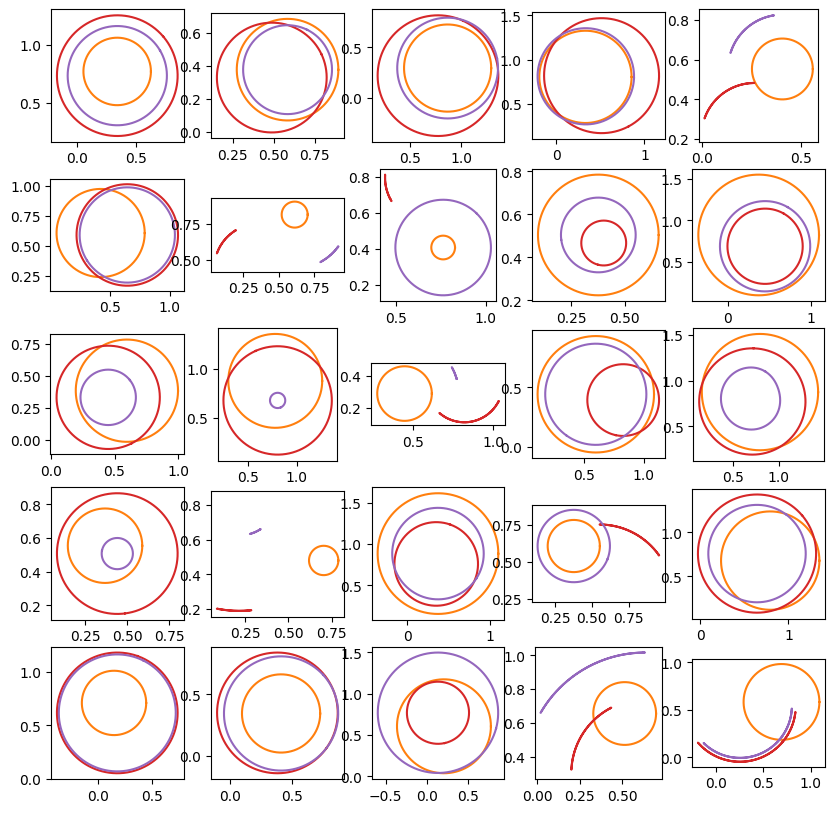

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plotn = 5
fig, axs = plt.subplots(plotn, plotn, figsize=(10, 10))
plt.figure()
for row in range(plotn):
    for col in range(plotn):
        for i in range(config["NODE_COUNT"]):
            data = results["sol"][row * plotn + col]
            axs[row, col].plot(data[i, :, 0], data[i, :, 1])
            axs[row, col].set_aspect("equal")